In [1]:
import matplotlib.pyplot as plt

Plan (draft 2):
- analyize accuracy (split dataset)
- README.md
- linear regression with scipy or some package
- Another type of regression.
- Take ranges of points and apply as points to regression model (divide the the range, max value to min, into a number of "buckets" and apply linear regression and test accuracy).

# Introduction

The purpose of this project is to train a model with the ` powerproduction` dataset to predict the electrical power output for a given wind speed. The model in question is a simple linear regression model which is explained below. The objective is to get an as accurate prediction as possible. We will first inspect the data and prepare it for training (we will have to split the data into training and testing groups). We will then train our model and do analysis to determine its accuracy. Lastly we will compare this to other types of regression.

## What is Simple Linear regression?

Firstly regression is “a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).”[1]
[1] Brian Beers [online], “Regression Definition”, https://www.investopedia.com/terms/r/regression.asp (accessed 25/10/2020)

What this means is that when we talk about regression we are talking about cause and effect. With regression you test how much effect a set of measurements (called independent variables) have on a particular outcome measurement (or a dependent variable). By analysing this relationship it is the intended purpose to be able to predict an unknown outcome variable (the dependent variable) when the independent variables are known.

Simple linear regression is when there is only one dependent variable. You are hoping that there is a direct correlation between you independent and dependent variable. You’ll see later that this is representative of a straight line (hence the term linear).

### How simple linear regression works

Lets take a car as an example. Lets say we know the distance of the car at particular time intervals as given here:

In [2]:
# distance in meters
distance = [0, 2, 4, 6, 8, 10, 12, 14, 16]
# time in seconds
times  = [0, 5, 10, 15, 20, 25, 30, 35, 40]

so our initial distance and time are zero and at 40 seconds our distance is 16 meters from our starting point. If we assume that the road the car is driving on has the same constancy through out and the only thing in the car that changes is the speed and distance from the starting point, we can map time verses distance 

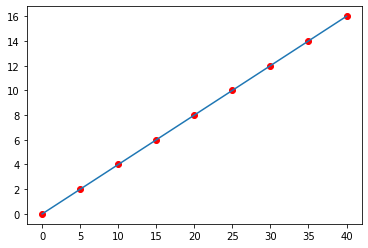

In [3]:
plt.plot(times, distance)
plt.scatter(times, distance, c="r")
plt.show()

the line drawn is just one way of representing this data but what we have drawn is a simple line of equation:

$$ y = mx + c $$

where:
- $ y = displacement (s) $
- $ x = time (t) $
- $ m = speed/velocity (v) $
- $ c = constant \: (zero \: because \: line \: goes \: through \: origin)$

So filling in our line above can be represented as (no constant because it goes through centre (0, 0)):

$$ displacement = speed(time) $$

So rearranging we can use this formula to determine the speed at any given displacement and time.

$$ speed = \frac{displacement}{time} $$

And this is what a linear regresson model does. It gives you, based on the data points given, the best fitting straight line to these points. 

The thing is the world isn't always exact as the above example. Plus what has this simple model got to do with linear regression?? We're nearly there, promise.

First we'll need a set of measurements that are more like real world data (a little scattered). Our first element as well will be off the center just to make things interesting.

In [4]:
# distance in meters
s = [1, 2, 3, 6, 7, 10, 12, 15, 16]
# time in seconds
t  = [0, 5, 10, 15, 20, 25, 30, 35, 40]

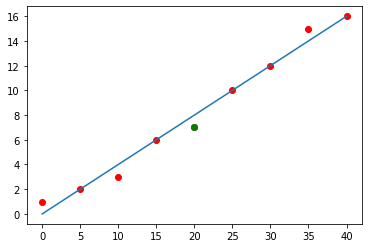

In [5]:
plt.plot(times, distance)
plt.scatter(t, s, c="r")
plt.scatter(t[4], s[4], c="g")
plt.show()

I have fabricated this data. But what if you were given the above as "real" data and wanted to find the best fitted line?

### Well what do we mean by "best fit"?

By best fit we mean that the error between our orignal data and our predictive simple linear model is, collectively, lowest. We will calculate this error as the difference between our "real" displacement and that of our model (or line). This error (which we will represent as $ \varepsilon $ for the sum of and $ e $ for a single value) is denoted by $ e_i = y_i - \hat{y}_i $. Where $ y $ is the value of the displacement of a point given in the data and $ \hat{y} $ is the value of the displacement in our model for the same $ x $ (time in this case).

![Explaining Error](imgs/ExplainingError.png)

Let's take point 5 (the green dot above) to explain this. The green dot doesn't fall on the line. Which means that when using this simple linear regression model there is an error here. Our $ y_i $ in this instance is 7 and our $ \hat{y}_i $ is 8. Remember these ore our data value and model value of displacement for the same time ($ x_i $ in this instance). Now we can use our error equation:

$$ e_i = y_i - \hat{y}_i $$

It is work pointing out that $ y_i $ is the $ y $ value of the $ i^th $ point in our dataset and $ \hat{y}_i $ is the value given from the equation of the line:

$$ \hat{y}_i = mx_i + c $$


Now we're currently investigating the 5th point so lets fill that in for continuity.

$$ e_5 = y_5 - \hat{y}_5 $$

Now our values:

$$ e_5 = 7 - 8 $$

To the keen observer there is an inherent problem here. The error here is minus one and the error somewhere else could be +1 and then if we're supposed to find an accumulative error then we're kind of goosed. So we have two choices (probably more but let's keep it simple for now), before adding them we could:

- Use the absolute value of each error (called the least absolute value) or
- Use the squared valued of each error (called the least squares value)

Later on I'll have to work out the slope and the constant of the line. I'll do this with differentiation so the absolute value will just turn to zero. So going forward I will be using the least squares value:

Least squares value (LSV): $$ e_i = {(y_i - \hat{y}_i)}^2 $$

So when we add the above for each point this is how we will judge the accuracy of our model. In other words it will be the error for each data point added together:

$$ \varepsilon = \sum\limits_{n}^{i=1}e_i $$

Great! We have a way to judge how accurate our chosen line is! So how do I go about choosing lines ..... 

Turns out I have to back to my equation of a line from above. We want our model to be as accurate as we can make it so we won't limit it by saying it has to go through the center (meaning we will use a constant & c & if it means a more accurate fitted line).

I also need to revamp the notation of the line. It is technically the same it just looks different:

$$ \hat{y}_i = b_0 + b_1x_i $$

Where:

- $ x_i $ are our independent variables.
- $ \hat{y}_i $ are the dependent variables produced by the model.
- $ b_0 $ is where the line crosses the y-axis (denoted above as c).
- $ b_1 $ is the slop of the line (denoted above as m).

So basically we have to find the values for $ b_0 $ and $ b_1 $ the minimize the error $ \varepsilon $. We know that our error is the following:

$$ \varepsilon = \sum\limits_{n}^{i=1}{(y_i - \hat{y}_i)}^2 $$

And that:

$$ \hat{y}_i = mx_i + c $$

So filling in we get:

$$ \varepsilon = \sum\limits_{n}^{i=1}{(y_i - mx_i - c)}^2 $$

Filling in the new notation:

$$ \varepsilon = \sum\limits_{n}^{i=1}{(y_i - b_1x_i - b_0)}^2 $$

We will first differentiate the error with repect to the slope $ b_1 $ while treating $ b_0 $ as a constant:

$$ \frac{\delta \varepsilon}{\delta b_1} = \frac{\sum\limits_{n}^{i=1}{(y_i - b_1x_i - b_0)}^2}{\delta b_1} $$

Becomes:

$$ \Longrightarrow \frac{\delta \varepsilon}{\delta b_1} = -2\sum\limits_{n}^{i=1}(y_i - b_1x_i - b_0)(x_i) $$

And similarly differentiating the error with repect to $ b_0 $ while treating $ b_1 $ as a constant:

$$ \frac{\delta \varepsilon}{\delta b_0} = \frac{\sum\limits_{n}^{i=1}{(y_i - b_1x_i - b_0)}^2}{\delta b_0} $$

Becomes:

$$ \Longrightarrow \frac{\delta \varepsilon}{\delta b_0} = -2\sum\limits_{n}^{i=1}(y_i - b_1x_i - b_0) $$

Now set them both equal to zero and solve them as simultaneous equations with two variables:

For $ b_1 $ the slope of the line: 

$$ \frac{\delta \varepsilon}{\delta b_1} = 0 $$

$$ \Longrightarrow -2\sum\limits_{n}^{i=1}(y_i - b_1x_i - b_0)(x_i) = 0 $$

$$ \Longrightarrow \sum\limits_{n}^{i=1}(y_i - b_1x_i - b_0)(x_i) = 0 $$

$$ \Longrightarrow \sum\limits_{n}^{i=1}(y_ix_i - b_1{x_i}^2 - b_0x_i) = 0 $$

$$ \Longrightarrow \sum\limits_{n}^{i=1}y_ix_i - \sum\limits_{n}^{i=1}b_1{x_i}^2 - \sum\limits_{n}^{i=1}b_0x_i = 0 $$

$$ \Longrightarrow b_1\sum\limits_{n}^{i=1}{x_i}^2 = \sum\limits_{n}^{i=1}y_ix_i - b_0\sum\limits_{n}^{i=1}x_i $$

$$ \Longrightarrow b_1 = \frac{\sum\limits_{n}^{i=1}y_ix_i - b_0\sum\limits_{n}^{i=1}x_i}{\sum\limits_{n}^{i=1}{x_i}^2} $$

For $ b_0 $ the y intercept of the line: $$ \frac{\delta \varepsilon}{\delta b_0} = 0 $$

$$ \Longrightarrow -2\sum\limits_{n}^{i=1}(y_i - b_1x_i - b_0) = 0 $$

$$ \Longrightarrow \sum\limits_{n}^{i=1}y_i - \sum\limits_{n}^{i=1}b_1x_i - \sum\limits_{n}^{i=1}b_0 = 0 $$

$$ \Longrightarrow \sum\limits_{n}^{i=1}y_i - b_1\sum\limits_{n}^{i=1}x_i - b_0\sum\limits_{n}^{i=1}1 = 0 $$

$$ \Longrightarrow b_0\sum\limits_{n}^{i=1}1 = \sum\limits_{n}^{i=1}y_i - b_1\sum\limits_{n}^{i=1}x_i $$

$$ \Longrightarrow b_0 = \frac{\sum\limits_{n}^{i=1}y_i - b_1\sum\limits_{n}^{i=1}x_i}{\sum\limits_{n}^{i=1}1} $$

$$ \Longrightarrow b_0 = \frac{\sum\limits_{n}^{i=1}y_i}{\sum\limits_{n}^{i=1}1} - \frac{b_1\sum\limits_{n}^{i=1}x_i}{\sum\limits_{n}^{i=1}1} $$

Where $ \frac{\sum\limits_{n}^{i=1}y_i}{\sum\limits_{n}^{i=1}1} $ and $ \frac{\sum\limits_{n}^{i=1}x_i}{\sum\limits_{n}^{i=1}1} $ are the mean values $ \bar y $ and $ \bar x $ respectively:

$$ \Longrightarrow b_0 = \bar y - b_1 \bar x $$

Solving the simultaeous equations:

$$ b_1 = \frac{\sum\limits_{n}^{i=1}y_ix_i - b_0\sum\limits_{n}^{i=1}x_i}{\sum\limits_{n}^{i=1}{x_i}^2} $$

$$ \Longrightarrow b_1 = \frac{\sum\limits_{n}^{i=1}y_ix_i - (\bar y - b_1 \bar x)\sum\limits_{n}^{i=1}x_i}{\sum\limits_{n}^{i=1}{x_i}^2} $$

$$ \Longrightarrow b_1 \sum\limits_{n}^{i=1}{x_i}^2 = \sum\limits_{n}^{i=1}y_ix_i - (\bar y - b_1 \bar x)\sum\limits_{n}^{i=1}x_i $$

$$ \Longrightarrow b_1 \sum\limits_{n}^{i=1}{x_i}^2 = \sum\limits_{n}^{i=1}y_ix_i + b_1 \bar x\sum\limits_{n}^{i=1}x_i -\bar y\sum\limits_{n}^{i=1}x_i $$

$$ \Longrightarrow b_1 \sum\limits_{n}^{i=1}{x_i}^2 - b_1 \bar x\sum\limits_{n}^{i=1}x_i = \sum\limits_{n}^{i=1}y_ix_i -\bar y\sum\limits_{n}^{i=1}x_i $$

$$ \Longrightarrow b_1 (\sum\limits_{n}^{i=1}{x_i}^2 - \bar x\sum\limits_{n}^{i=1}x_i) = \sum\limits_{n}^{i=1}y_ix_i -\bar y\sum\limits_{n}^{i=1}x_i $$

$$ \Longrightarrow b_1 = \frac{\sum\limits_{n}^{i=1}y_ix_i -\bar y\sum\limits_{n}^{i=1}x_i }{\sum\limits_{n}^{i=1}{x_i}^2 - \bar x\sum\limits_{n}^{i=1}x_i} $$

And because n is the number of values in the given dataset when we multiply the mean by n it is equal to adding up every number (i.e. $ n\bar x = \sum\limits_{n}^{i=1}x_i $). So filling in we get:

$$ \Longrightarrow b_1 = \frac{\sum\limits_{n}^{i=1}y_ix_i -n\bar y\bar x }{\sum\limits_{n}^{i=1}{x_i}^2 - n\bar x \bar x} $$

Slope:  0.4
y intercept:  0.0


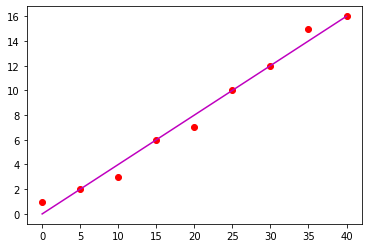

In [6]:
# distance in meters
y = [1, 2, 3, 6, 7, 10, 12, 15, 16]
# time in seconds
x  = [0, 5, 10, 15, 20, 25, 30, 35, 40]

ybar = []

b1 = (sum(y)*sum(x) - len(x)*(sum(y)/len(y))*(sum(x)/len(x)))/((sum(x))**2- (len(x)*(sum(x)/len(x))*(sum(x)/len(x))))

b0 = (sum(y)/len(y)) - b1*(sum(x)/len(x))

print("Slope: ", b1)
print("y intercept: ", b0)

for i in range(0, len(x)):
    ybar.append(b1*x[i] + b0)
    
plt.scatter(x, y, c="r")    
plt.plot(x, ybar, c="m")


In [7]:
def simpleLinearRegression(independentVars, dependentVars):
    # distance in meters
    y = dependentVars
    # time in seconds
    x  = independentVars

    yhat = []
    errors = []

    b1 = (sum(y)*sum(x) - len(x)*(sum(y)/len(y))*(sum(x)/len(x)))/((sum(x))**2- (len(x)*(sum(x)/len(x))*(sum(x)/len(x))))

    b0 = (sum(y)/len(y)) - b1*(sum(x)/len(x))
    
    for i in range(0, len(x)):
        yhat.append(b1*x[i] + b0)
        errors.append((y[i] - yhat[i])**2)
        
    accuarcy = sum(errors)
    print(accuarcy)
        
    plt.scatter(x, y, c="r")    
    plt.plot(x, yhat, c="m")

265989.41437957867


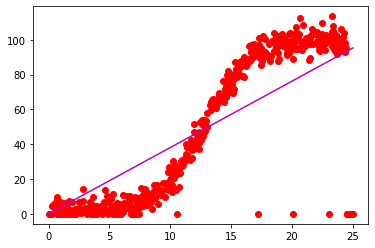

In [16]:
import csv

with open('powerproduction.csv', 'r', newline='') as file:
    has_header = csv.Sniffer().has_header(file.read(1024))
    file.seek(0)  # Rewind.
    reader = csv.reader(file)
    if has_header:
        next(reader)
    your_list = list(reader)

independentVars = []
dependentVars = []

for i in range(len(your_list)):
    independentVars.append(float(your_list[i][0]))
    dependentVars.append(float(your_list[i][1]))
    
simpleLinearRegression(independentVars, dependentVars)

123947.64739644631


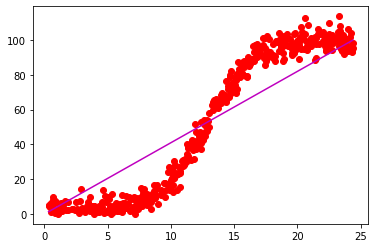

In [25]:
for i in range(len(dependentVars)):
    if (dependentVars[i] == 0.000):
        del dependentVars[i]
        del independentVars[i]
        
simpleLinearRegression(independentVars, dependentVars)


123947.64739644631


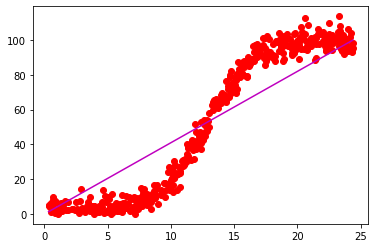

In [26]:
simpleLinearRegression(x, y)

In [27]:
def Regression(independentVars, dependentVars):
    # distance in meters
    y = dependentVars
    # time in seconds
    x  = independentVars

    yhat = []
    errors = []
    
    sumxi = sum(x)
    sumyi = sum(y)
    meanx = (sum(x)/len(x))
    meany = (sum(y)/len(y))
    
    b3 = ((meany*((sumxi)**3)) - (sumyi*(sumxi**3)))/((meanx*(sumxi**4)) - sumxi**5)
    
    b2 = ((sumyi*(sumxi**2)) - meany*(sumxi**2) + b3*(meanx*(sumxi**4)) - sumxi**5)/((meanx*(sumxi**3)) - sumxi**4)
    
    b1 = ((sumxi*sumyi) - (meany * sumxi) + b2 * ((meanx*(sumxi**2)) - sumxi**3) - b3*((meanx*(sumxi**3)) - sumxi**4))/((meanx*sumxi) - sumxi**2)
    
    b0 = meany - b1*meanx - b2*meanx*(sumxi) - b3*meanx*(sumxi**4)
    
    for i in range(0, len(x)):
        yhat.append(b0 + b1*x[i] + b2*((x[i])**2) + b3*((x[i])**3))
        errors.append((y[i] - yhat[i])**2)
        
    accuarcy = sum(errors)
    print(accuarcy)
        
    plt.scatter(x, y, c="r")    
    plt.plot(x, yhat, c="m")

In [21]:
y = dependentVars
    # time in seconds
x  = independentVars
sumxi = sum(x)
sumyi = sum(y)
meanx = (sum(x)/len(x))
meany = (sum(y)/len(y))
b3 = (meany*(sumxi)**3 - (sumxi*sumyi)**3)/(meanx*sumxi**4 - sumxi**5)

5.201485669333787e+28


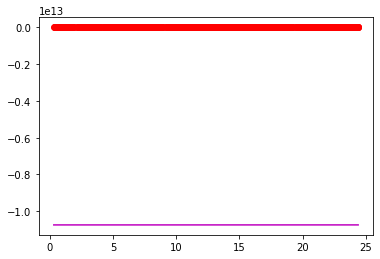

In [28]:
Regression(independentVars, dependentVars)